In [1]:
#importing libraries
import pandas as pd
import seaborn as sns  # For data visualization 
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np  # For mathematical calculations 
import warnings   # To ignore any warnings 
warnings.filterwarnings("ignore")

In [2]:
#importing Data set Of GOld_prices (.csv_format)
data = pd.read_csv('gld_price_data.csv')
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [3]:
#descriptives of dataset
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [4]:
#information Of DataSet
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
#No. of rows and columns in our data_set
data.shape

(2290, 6)

In [6]:
#checking if there is a missing Value 
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Text(0.5, 1.05, 'Correlation of Features in Data')

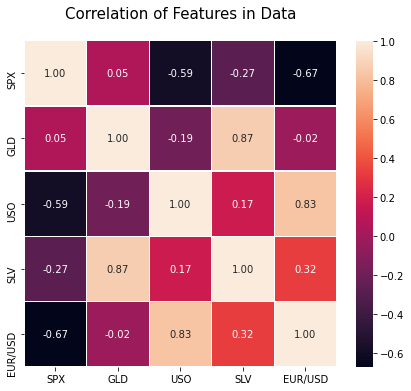

In [7]:
#heat map to understand correlation between variables
corr = data.corr()
plt.figure(figsize = (7,6))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30 ,)
plt.title('Correlation of Features in Data', y = 1.05, size=15)

Gold_prices are highly correlated with SLV

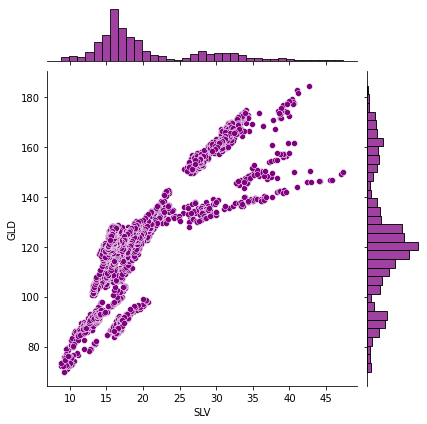

In [8]:
#Now we check the relation of GLD variable with SLV
sns.jointplot(x =data['SLV'], y = data['GLD'], color = 'purple')


Our target variable is GLD ie. the gold_prices

In [9]:
#checking correlation values of GLD
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Density'>

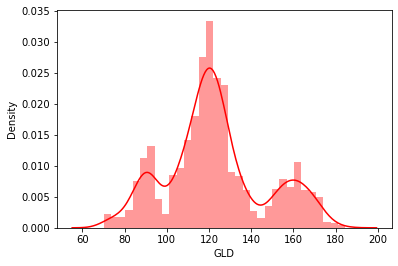

In [10]:
#visualising distribution Of Gold Prices
sns.distplot(data['GLD'] , color = 'red')

GLD price is quite uniformly Distributed

<AxesSubplot:xlabel='years'>

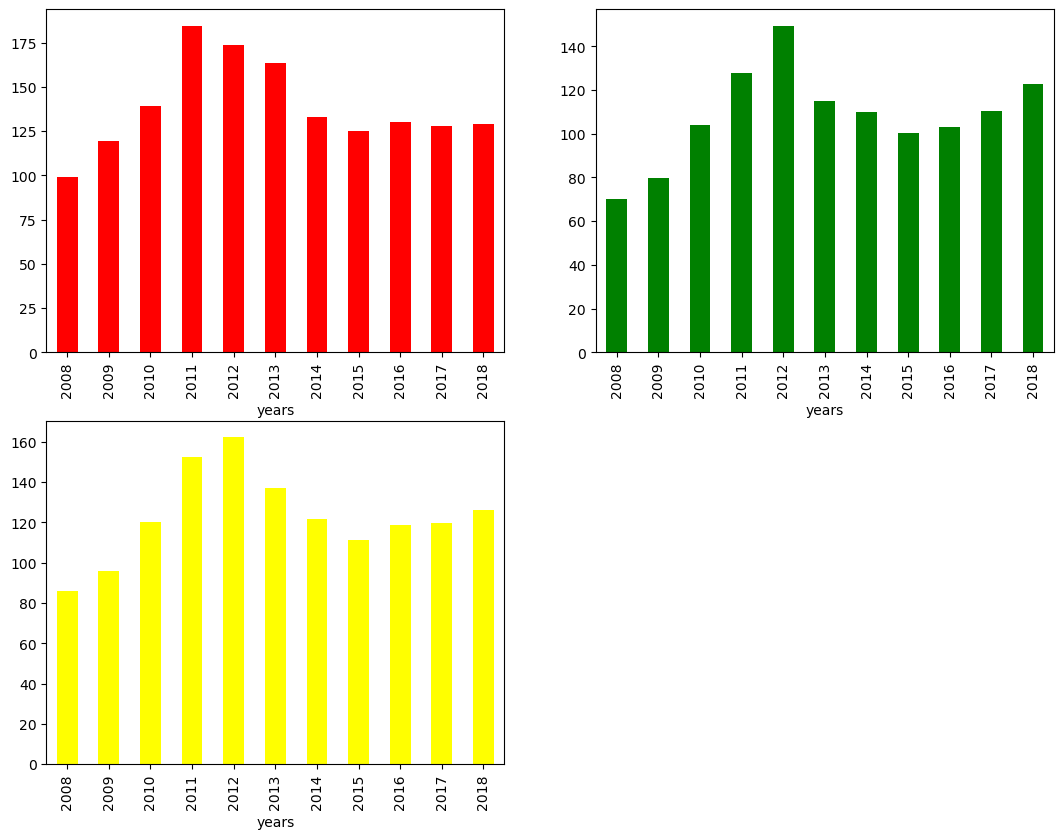

In [11]:
# Extracting years from date
time = pd.DatetimeIndex(data['Date'])
plt.figure(figsize = (13,10) , dpi = 100)

data['years'] = time.year
plt.subplot(2 , 2 , 1)
data.groupby('years')['GLD'].max().plot(kind = 'bar' , color = 'red')
plt.subplot(2 , 2 , 2)
data.groupby('years')['GLD'].min().plot(kind = 'bar' , color = 'green')
plt.subplot(2 , 2 , 3)
data.groupby('years')['GLD'].mean().plot(kind = 'bar' , color = 'yellow')


Here we have plotted Bar Graphs for max , min and mean of gold_prices from 2008 to 2018.

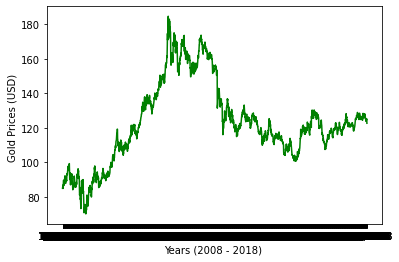

In [12]:
#plotting Gold Price Trend over different Years
plt.plot(data['Date'] , data['GLD'] , color = 'green')
plt.xlabel('Years (2008 - 2018) ')
plt.ylabel('Gold Prices (USD) ')
plt.show()

In [13]:
data.drop(columns = ['Date' , 'years'] , inplace = True , axis = 1)

In [14]:
data.head(5)

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


# Training Our Model Using Random Forest

In [15]:
X = data.drop(columns = ['GLD'] , axis = 1)
Y = data['GLD']

In [16]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [18]:
#Spliting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [19]:
#Now fitting the Random forest regression to the traning set
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor
#Create a Gaussian Classifier
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
#Train the model using the training sets y_pred=clf.predict(X_test)
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [20]:
y_pred = regressor.predict(x_test)



In [21]:
y_pred.shape

(458,)

In [22]:
y_test.shape

(458,)

In [23]:
#score of our Model
regressor.score(x_test , y_test)


0.9899648553789232

In [25]:
y_test = list(y_test)

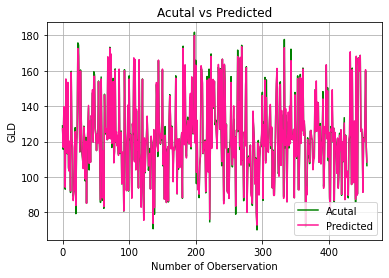

In [27]:
#Visualising Predictions vs Actual
plt.plot(y_test, color = 'green', label = 'Acutal')
plt.plot(y_pred, color = 'deeppink', label = 'Predicted')
plt.grid(0.3)
plt.title('Acutal vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('GLD')
plt.legend()
plt.show()